# Install & Import Library

In [3]:
%pip install tensorflow keras matplotlib numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Import Library

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
import os

# Path Dataset

In [5]:
base_dir = "dataset"  # pastikan ini sesuai nama folder dataset

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

# Data Generator

In [6]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 3858 images belonging to 2 classes.
Found 963 images belonging to 2 classes.


# Load MobileNetV2 Pretrained

In [7]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

# Tambah layer custom
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile Model

In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training Model

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=10
)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 123s 979ms/step - accuracy: 0.9720 - loss: 0.0892 - val_accuracy: 0.9990 - val_loss: 0.0175
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 109s 904ms/step - accuracy: 0.9979 - loss: 0.0122 - val_accuracy: 1.0000 - val_loss: 0.0080
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1824s 15s/step - accuracy: 0.9987 - loss: 0.0068 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 116s 962ms/step - accuracy: 0.9987 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 566s 5s/step - accuracy: 0.9997 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 117s 964ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 415s 3s/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9990 - val_loss: 0.0033
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 116s 960ms/step - accuracy: 1.0000 - loss: 

# Evaluasi

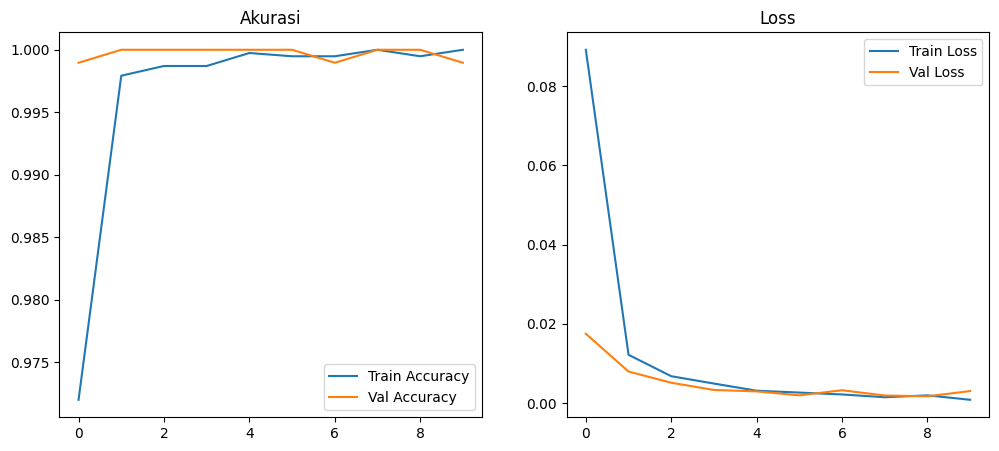

In [10]:
plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Akurasi')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

# Prediksi Gambar Baru

In [ ]:
from keras.preprocessing import image
# try
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    label = "Burung" if prediction[0][0] < 0.5 else "Kupu-Kupu"
    print(f"Prediksi: {label}")

predict_image("dataset/birds/train/BIRD OF PARADISE/006.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
Prediksi: Burung


# Simpan Model

In [ ]:
model.save("butterfly_vs_bird_model.h5")
# nice